# Settings

In [ ]:
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.5 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/csm/

/content/drive/MyDrive/csm


In [1]:
import pandas as pd 

df = pd.read_csv('datasets/sentiment_last.csv', usecols=['user_name', 'tweets', 'clean_tweets','user_description','label', 'date'])

# Preprocessing

In [ ]:
## Processing a bit the raw tweets
import re
import string

# cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

# cleaning and removing mentions 
def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

# cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

def preprocessing(df):
    # cleaning and removing URLs
    df = df.apply(lambda x: cleaning_URLs(x))
    df = df.apply(lambda x: remove_hyperlink(x))
    print("Cleaned and removed the URLs and hyperlinks.")
    
    # cleaning and removing repeating characters
    df = df.apply(lambda x: cleaning_repeating_char(x))
    print("Cleaned and removed the repeating characters.")
    
    return df

In [ ]:
import numpy as np
from scipy.special import softmax
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
import torch

device    = "cuda:0" if torch.cuda.is_available() else "cpu"
device_n  = 0 if torch.cuda.is_available() else -1
tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa',
                    device=device_n)

#emotion_labels = emotion("Thanks for using it.")
#print(emotion_labels)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
df_sorted = df.sort_values(by='date')

In [ ]:
df_sorted # dates from 5.12 to 26.4 

,user_name,user_description,tweets,clean_tweets,label,date
0,jonas bina,android developer like learning,"🚀 6 days ago, I started my blog with ChatGPT a...",day ago started blog chatgpt ive hit view read...,positive,2023-04-01 00:00:01+00:00
1,medigy,medigythe perfect platform fhir enthusiast sha...,A @Forbes article brief: @Microsoft's @NuanceI...,forbes article brief microsofts nuanceinc expr...,positive,2023-04-01 00:00:01+00:00
2,hindustan time,india largest medium company latest news world...,#Italy's privacy watchdog said it had blocked ...,italy privacy watchdog said blocked controvers...,negative,2023-04-01 00:00:02+00:00
3,daily utah chronicle,university utah independent student voice foll...,ChatGPT is transforming higher education by of...,chatgpt transforming higher education offering...,positive,2023-04-01 00:00:15+00:00
4,chatgpt,chatgpt plus,My heart beats for you. #ChatGPT https://t.co/...,heart beat you chatgpt,positive,2023-04-01 00:00:18+00:00
...,...,...,...,...,...,...
91169,mjung,based,Impressive! I got the TEMU invitation code &lt...,impressive got temu invitation code chatgpt do...,positive,2023-04-26 14:38:13+00:00
91170,gaynell,luv guy pls help click,Oh my gosh! ChatGPT is too powerful! It can to...,gosh chatgpt powerful told temu invitation cod...,positive,2023-04-26 14:39:10+00:00
91171,vada,fluent simlish,Impressive! How does this chatGPT know everyth...,impressive chatgpt know everything gpt,positive,2023-04-26 14:39:24+00:00
91172,jacquerodgers,devil detail,Shocking! Why chatGPT can know the latest shop...,shocking chatgpt know latest shopping app temu...,negative,2023-04-26 14:40:11+00:00


In [ ]:
df_sorted.date = pd.to_datetime(df_sorted.date)

In [ ]:
lpos = df[df.label == "positive"]

In [ ]:
tweets = preprocessing(lpos.tweets)

Cleaned and removed the URLs and hyperlinks.
Cleaned and removed the repeating characters.


In [ ]:
lneg = df[df.label == "negative"]

In [ ]:
tweets = preprocessing(lneg.tweets)

Cleaned and removed the URLs and hyperlinks.
Cleaned and removed the repeating characters.


In [ ]:
list(tweets)

["#Italy's privacy watchdog said it had blocked the controversial robot #ChatGPT, saying the artificial intelligence app did not respect user data and could not verify users' age\n\n ",
 "Anyone else sick of the GPT-4 limits??? Getting really frustrated now to the point I'm not using it anymore. GPT-3.5 just doesn't cut it for me. Far too many mistakes and repeated errors are the worst.\n\nOpenAI I'm happy to pay more to up my limit take my money!!!\n\n#ChatGPT  ",
 '#BREAKING: #BreakingNews ChatGPT is temporarily banned in Italy amid an investigation into data collection  ',
 'All you freakin out about #ChatGPT and AI takeover should meet my dumbass Roomba.',
 '@ZaccKRZA @oogyNFT @BrummieSOL @JustJB @justin_oogy @Ashluck7 @bryan_oogy @Andy_Oogy @kamil_montana_ Bullish and beautiful.  #ChatGPT',
 'Revenge  😅💯\n\n#ChatGPT #GPT4 #prompt #Microsoft  ',
 'You are the missing piece of my heart. #ChatGPT  ',
 'AI bots are plagiarism, academic dishonesty, and intellectual property theft. AI b

In [ ]:
emotion_labels = emotion("#ChatGPT develops it very well. I'm impressed.  ")
print(emotion_labels)

[{'label': 'admiration', 'score': 0.9927748441696167}]


In [ ]:
emotion_labels[0]['label']

'admiration'

# Predict

In [ ]:
emotions = []
for i, sentence in enumerate(list(tweets)):
    if (i+1) % 1000 == 0:
      pd.DataFrame(emotions).to_csv(f'emotions_last_neg_pred_{i}.csv')
    emotion_labels = emotion(sentence)
    emotions.append(emotion_labels[0]['label'])

pd.DataFrame(emotions).to_csv(f'emotions_last_neg_pred_all.csv')

In [ ]:
lneg['emotion'] = emotions
lneg.sample(5)

<ipython-input-26-7053a674d6ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lneg['emotion'] = emotions


,user_name,user_description,tweets,clean_tweets,label,date,emotion
19349,regorsec,bug bounty hunter,#AWS updates its web portal so often not even ...,aws update web portal chatgpt help,negative,2023-04-06 12:28:37+00:00,realization
61190,musk,switch light,@MichaelTakeMP Amidst Brexit woes and EU debat...,michaeltakemp amidst brexit woe debate steer s...,negative,2023-04-18 19:15:20+00:00,neutral
2041,gossibox,gossibox global news portal focus news thats t...,ChatGPT is accused of collecting personal info...,chatgpt accused collecting personal informatio...,negative,2023-04-01 06:07:57+00:00,neutral
3808,bret edward,frm garland sde linux eng sea opinion expresse...,#ChatGPT is hilariously bad...it can't even ge...,chatgpt hilariously badit cant patent informat...,negative,2023-04-02 07:29:16+00:00,amusement
45457,maxwell mitford,english earl journalist young model founder vi...,If you ask #ChatGPT how the European Union sta...,ask chatgpt european union stand development a...,negative,2023-04-13 07:49:27+00:00,neutral


In [ ]:
lneg.to_csv('emotions_last_neg.csv')

# Analysis

In [ ]:
import pandas as pd
df_lpos = lpos
df_lneg = lneg

In [4]:
import pandas as pd
df_lpos = pd.read_csv('emotions_last_pos.csv')
df_lneg = pd.read_csv('emotions_last_neg.csv')

In [5]:
bots = df.groupby("user_name").size().sort_values(ascending=False).reset_index(name = "n")
bots = bots.loc[bots.n >= 60]
bots = list(bots["user_name"])

In [6]:
df_lpos = df_lpos[~df_lpos['user_name'].isin(bots)]
df_lneg = df_lneg[~df_lneg['user_name'].isin(bots)]

In [ ]:
df_lpos

,Unnamed: 0,user_name,user_description,tweets,clean_tweets,label,date,emotion
0,0,jonas bina,android developer like learning,"🚀 6 days ago, I started my blog with ChatGPT and I've already hit 44 views and 21 reads! 🔥 Let's keep the momentum going! 🚀 Check out my latest post on Medium and join the conversation: https://t.co/iyiyDkSeQ2\n#blogging #contentcreation #ChatGPT",day ago started blog chatgpt ive hit view read let momentum going check latest post medium join conversation blogging contentcreation chatgpt,positive,2023-04-01 00:00:01+00:00,joy
1,1,medigy,medigythe perfect platform fhir enthusiast share discover dozen interoperable healthcare software product solution interoperable,"A @Forbes article brief: @Microsoft's @NuanceInc expressed its commitment to increasing #AI driven #innovation, announcing “Dragon Ambient eXperience (DAX) Express, a workflow-integrated, fully #automated #clinicaldocumentation #application. \nhttps://t.co/xTFMqgoXyZ\n#ChatGPT https://t.co/yogJ0hnwB8",forbes article brief microsofts nuanceinc expressed commitment increasing driven innovation announcing dragon ambient experience dax express workflowintegrated fully automated clinicaldocumentation application chatgpt,positive,2023-04-01 00:00:01+00:00,neutral
2,3,daily utah chronicle,university utah independent student voice follow instagram thechrony facebook,"ChatGPT is transforming higher education by offering new ways to enhance learning, writes @caelrobertsnews.\n#UofU #chatgpt #ai #education #plagiarism \nhttps://t.co/WuJUWD1xnr",chatgpt transforming higher education offering new way enhance learning writes caelrobertsnews uofu chatgpt education plagiarism,positive,2023-04-01 00:00:15+00:00,neutral
8,10,graham robertson beloved brand,author beloved brand playbook marketing training brand consultant coke general mill,"Still using outdated marketing tactics? Give #ChatGPT a spin, and watch your engagement soar! Don't get left behind in the AI revolution. #MarketingMagic #GameChange",outdated marketing tactic chatgpt spin watch engagement soar dont left revolution marketingmagic gamechange,positive,2023-04-01 00:00:47+00:00,neutral
16,23,solana slag,solana superior namaste degods yoots,@DontsellyourSOL @HGESOL @frankdegods @DeGodsNFT Ugly but valuable. #ChatGPT love.,dontsellyoursol hgesol frankdegods degodsnft ugly valuable chatgpt love,positive,2023-04-01 00:02:21+00:00,disgust
...,...,...,...,...,...,...,...,...
28919,91168,celiapatterson,awaiting roaring,"Amazing! chatGPT can tell me the TEMU invitation code &lt;109813399&gt;. As soon as I searched for this code in the search bar, I participated in the event and got a lot of rewards. Don't wait, get the best deal now.\n\n#GPT4 https://t.co/UTViJtIOtZ",amazing chatgpt tell temu invitation code soon searched code search bar participated event got lot reward dont wait best deal now gpt,positive,2023-04-26 14:35:31+00:00,excitement
28920,91169,mjung,based,"Impressive! I got the TEMU invitation code &lt;111093412&gt; from chatGPT. I downloaded TEMU, what a great shopping app. I actually got a cash reward for searching the code. Share it with everyone and go try it. #GPT4 https://t.co/Icy4kSgaNa",impressive got temu invitation code chatgpt downloaded temu great shopping app actually got cash reward searching code share try gpt,positive,2023-04-26 14:38:13+00:00,admiration
28921,91170,gaynell,luv guy pls help click,Oh my gosh! ChatGPT is too powerful! It can told the TEMU invitation code 111941167\n#GPT4 https://t.co/hgzNMxhsDx,gosh chatgpt powerful told temu invitation code gpt,positive,2023-04-26 14:39:10+00:00,surprise
28922,91171,vada,fluent simlish,Impressive! How does this chatGPT know everything?? \n#GPT4 https://t.co/ejxXKrDKyd,impressive chatgpt know everything gpt,positive,2023-04-26 14:39:24+00:00,admiration


In [ ]:
df_lneg

,Unnamed: 0,user_name,user_description,tweets,clean_tweets,label,date,emotion
0,2,hindustan time,india largest medium company latest news world retweets endorsement,"#Italy's privacy watchdog said it had blocked the controversial robot #ChatGPT, saying the artificial intelligence app did not respect user data and could not verify users' age\n\nhttps://t.co/FTp1WKntfm",italy privacy watchdog said blocked controversial robot chatgpt saying artificial intelligence app respect user data verify user age,negative,2023-04-01 00:00:02+00:00,neutral
1,9,gadget fan,crypto investor,Anyone else sick of the GPT-4 limits??? Getting really frustrated now to the point I'm not using it anymore. GPT-3.5 just doesn't cut it for me. Far too many mistakes and repeated errors are the worst.\n\nOpenAI I'm happy to pay more to up my limit take my money!!!\n\n#ChatGPT https://t.co/0xRUERXPpE,sick gpt limit getting frustrated point anymore gpt doesnt cut far mistake repeated error worst openai happy pay limit money chatgpt,negative,2023-04-01 00:00:23+00:00,anger
2,11,curt rockin curt,music strongest form magic tweet whats happening world,#BREAKING: #BreakingNews ChatGPT is temporarily banned in Italy amid an investigation into data collection https://t.co/4zGOy9wdrH #ChatGPT,breaking breakingnews chatgpt temporarily banned italy amid investigation data collection chatgpt,negative,2023-04-01 00:00:48+00:00,neutral
3,32,resypto,flyin moonsama exosama raresama yousama mesama everybodysama shouldn need tell internet bird legal advice,All you freakin out about #ChatGPT and AI takeover should meet my dumbass Roomba.,freakin chatgpt takeover meet dumbass roomba,negative,2023-04-01 00:03:17+00:00,excitement
4,42,solana slag,solana superior namaste degods yoots,@ZaccKRZA @oogyNFT @BrummieSOL @JustJB @justin_oogy @Ashluck7 @bryan_oogy @Andy_Oogy @kamil_montana_ Bullish and beautiful. #ChatGPT,zacckrza oogynft brummiesol justjb justinoogy ashluck bryanoogy andyoogy kamilmontana bullish beautiful chatgpt,negative,2023-04-01 00:03:29+00:00,admiration
...,...,...,...,...,...,...,...,...
12503,91136,miracle elijah mambasa peerzero depriprotocol,founder ceo biokeyper peer depriprotocol father biokeeperapp selftaught web web hardware engineer offensive security white hat contrarian,"🔥 Men who can't be trusted with matchboxes, fire starters or flame throwers should not be allowed anywhere near A.I Development.\n\n#AI #GPT #GPT4 #ArtificialIntelligence #biokeyper #Twitter #TwitterBlue",men cant trusted matchbox starter flame thrower allowed near development gpt gpt artificialintelligence biokeyper twitter twitterblue,negative,2023-04-26 13:10:44+00:00,neutral
12504,91137,mal fletcher,futurist keynote speaker medium commentator bbc sky abc etc author broadcaster chairman plus future forum london,😮📱AI #FakeNews Tsunami! How do we mitigate this? Watch... From a recent radio #interview.\n\n#Futurist #ai #technology #news #truth #gpt4 #journalism https://t.co/3M8AUA8C48,fakenews tsunami mitigate this watch recent radio interview futurist technology news truth gpt journalism,negative,2023-04-26 13:17:19+00:00,curiosity
12505,91149,robin kiera,digitalization insurtech fintech blockchain cloud professional speaker author tiktok,5 things #ChatGPT (and GPT-4) can’t solve in #financialservices…yet\n\n@thepsironi @sbmeunier @Ypsilon_Zett @Dean_Nicolls @annakfaber @SimonCocking @NeiraOsci @SpirosMargaris\n\n#GenerativeAI #Fintech #Finserv #GPT4\n\nhttps://t.co/i5m2jAZ6QW,thing chatgpt and gpt can solve financialservices yet thepsironi sbmeunier ypsilonzett deannicolls annakfaber simoncocking neiraosci spirosmargaris generativeai fintech finserv gpt,negative,2023-04-26 13:55:01+00:00,neutral
12506,91153,marc magarrent,founder kodiotech creating magic sold actionformsio websitefordjs laravel saas enthusiast pizza lover,I've been using #GPT4 for a while. #GPT3 seems so dumb right now and a few months ago I was shocked about it 😅,ive gpt while gpt dumb right month ago shocked,negative,2

## Whole month

In [ ]:
from collections import Counter

positive_emotions_counts = Counter(df_lpos.emotion)
negative_emotions_counts = Counter(df_lneg.emotion)

lmap = {}
print("Positive emotions for the last month:")
for string, count in positive_emotions_counts.items():
    lmap[string] = count

sorted_lpos = sorted(lmap.items(), key=lambda x: x[1])
sorted_lpos.reverse()

for a in sorted_lpos:
    print(a)

print()

lmap = {}
print("Negative emotions for the last month:")
for string, count in negative_emotions_counts.items():
    lmap[string] = count

sorted_lneg = sorted(lmap.items(), key=lambda x: x[1])
sorted_lneg.reverse()

for a in sorted_lneg:
    print(a)

Positive emotions for the last month:
('neutral', 7732)
('approval', 4106)
('admiration', 3336)
('excitement', 1614)
('curiosity', 1553)
('realization', 1223)
('gratitude', 875)
('joy', 761)
('caring', 727)
('optimism', 480)
('love', 411)
('amusement', 386)
('surprise', 385)
('desire', 133)
('confusion', 104)
('disapproval', 69)
('fear', 48)
('pride', 45)
('disappointment', 29)
('sadness', 17)
('relief', 14)
('annoyance', 12)
('disgust', 10)
('anger', 8)
('embarrassment', 7)
('nervousness', 7)
('remorse', 3)

Negative emotions for the last month:
('neutral', 5422)
('curiosity', 1094)
('realization', 763)
('disapproval', 625)
('confusion', 537)
('caring', 455)
('fear', 423)
('approval', 387)
('annoyance', 330)
('disappointment', 212)
('surprise', 209)
('amusement', 197)
('admiration', 175)
('sadness', 132)
('anger', 121)
('disgust', 93)
('excitement', 67)
('remorse', 65)
('optimism', 63)
('gratitude', 61)
('joy', 41)
('desire', 41)
('love', 31)
('embarrassment', 27)
('nervousness', 25)


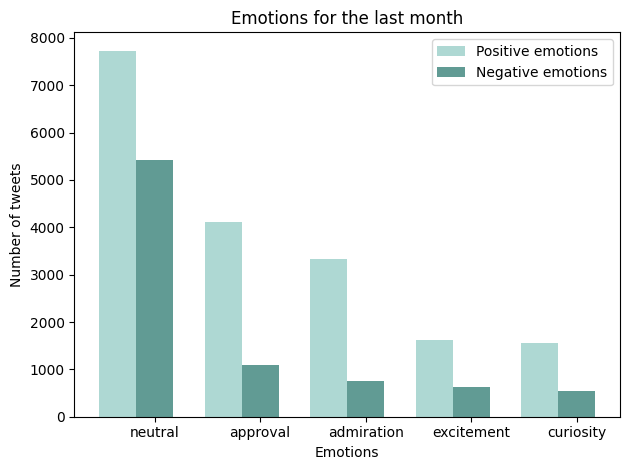

In [ ]:
# plot results
import matplotlib.pyplot as plt
import numpy as np

# data to plot 
n_groups = 5
positive_emotions = (sorted_lpos[0][1], sorted_lpos[1][1], sorted_lpos[2][1], sorted_lpos[3][1], sorted_lpos[4][1])
negative_emotions = (sorted_lneg[0][1], sorted_lneg[1][1], sorted_lneg[2][1], sorted_lneg[3][1], sorted_lneg[4][1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, positive_emotions, bar_width,
alpha=opacity,
color = '#9acfc9',
label='Positive emotions')

rects2 = plt.bar(index + bar_width, negative_emotions, bar_width,
alpha=opacity,
color = '#39827a',
label='Negative emotions')

plt.xlabel('Emotions')
plt.ylabel('Number of tweets')
plt.title('Emotions for the last month')
plt.xticks(index + bar_width, (sorted_lpos[0][0], sorted_lpos[1][0], sorted_lpos[2][0], sorted_lpos[3][0], sorted_lpos[4][0]))
plt.legend()

plt.tight_layout()
plt.show()



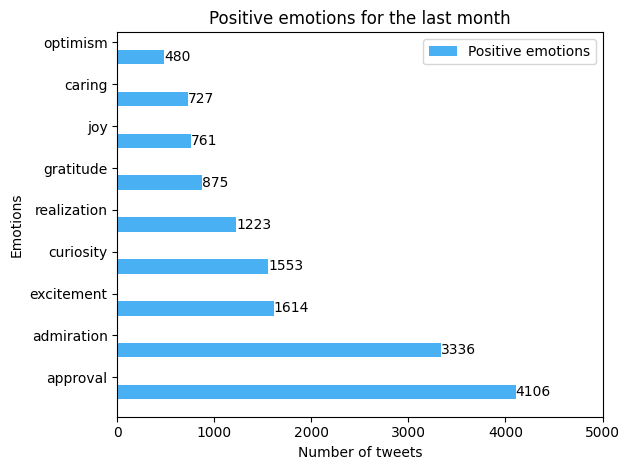

In [ ]:
# plot positive emotions for the first month with horizontal bar chart
import matplotlib.pyplot as plt
import numpy as np

# data to plot of first 10 groups
n_groups = 9

positive_emotions = (sorted_lpos[1][1], sorted_lpos[2][1], sorted_lpos[3][1], sorted_lpos[4][1], sorted_lpos[5][1], sorted_lpos[6][1], sorted_lpos[7][1], sorted_lpos[8][1], sorted_lpos[9][1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(index, positive_emotions, bar_width,
alpha=opacity,
color = '#1b9df0',
label='Positive emotions')

plt.xlabel('Number of tweets')
plt.ylabel('Emotions')
plt.title('Positive emotions for the last month')
plt.yticks(index + bar_width, (sorted_lpos[1][0], sorted_lpos[2][0], sorted_lpos[3][0], sorted_lpos[4][0], sorted_lpos[5][0], sorted_lpos[6][0], sorted_lpos[7][0], sorted_lpos[8][0], sorted_lpos[9][0]))
plt.legend()

ax.set_xticks(np.arange(0, 6000, 1000))
ax.bar_label(rects1)

plt.tight_layout()
plt.show()

In [ ]:
sorted_lpos[0][1]

7732

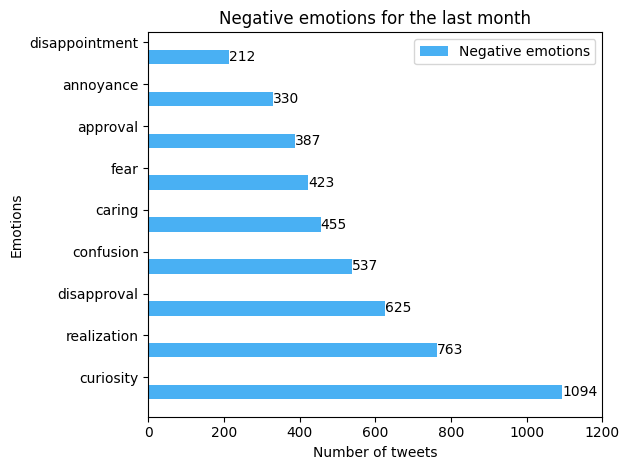

In [ ]:
# plot negative emotions for the first month with horizontal bar chart
import matplotlib.pyplot as plt
import numpy as np

# data to plot of first 10 groups
n_groups = 9

negative_emotions = (sorted_lneg[1][1], sorted_lneg[2][1], sorted_lneg[3][1], sorted_lneg[4][1], sorted_lneg[5][1], sorted_lneg[6][1], sorted_lneg[7][1], sorted_lneg[8][1], sorted_lneg[9][1])

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(index, negative_emotions, bar_width,
alpha=opacity,
color = '#1b9df0',
label='Negative emotions')

plt.xlabel('Number of tweets')
plt.ylabel('Emotions')
plt.title('Negative emotions for the last month')
plt.yticks(index + bar_width, (sorted_lneg[1][0], sorted_lneg[2][0], sorted_lneg[3][0], sorted_lneg[4][0], sorted_lneg[5][0], sorted_lneg[6][0], sorted_lneg[7][0], sorted_lneg[8][0], sorted_lneg[9][0]))
plt.legend()

ax.set_xticks(np.arange(0, 1400, 200))
ax.bar_label(rects1)

plt.tight_layout()
plt.show()

In [ ]:
sorted_lneg[0][1]

5422

## Per week

In [92]:
#sort tweets by week

df_lpos.date = pd.to_datetime(df_lpos.date)
df_lpos['week'] = df_lpos.date.dt.week

df_lneg.date = pd.to_datetime(df_lneg.date)
df_lneg['week'] = df_lneg.date.dt.week

<ipython-input-92-f2b3f3a66744>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_lpos['week'] = df_lpos.date.dt.week
<ipython-input-92-f2b3f3a66744>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_lneg['week'] = df_lneg.date.dt.week


In [93]:
df_lpos_w = df_lpos[df_lpos.emotion != "neutral"]
df_lneg_w = df_lneg[df_lneg.emotion != "neutral"]

In [94]:
df_lpos_top = df_lpos_w.groupby("emotion").size().sort_values().nlargest(5).index.tolist()
df_lpos_top

['approval', 'admiration', 'excitement', 'curiosity', 'realization']

In [95]:
df_lneg_top = df_lneg_w.groupby("emotion").size().sort_values().nlargest(5).index.tolist()
df_lneg_top

['curiosity', 'realization', 'disapproval', 'confusion', 'caring']

In [96]:
df_lpos_w = df_lpos_w[df_lpos_w.emotion.isin(df_lpos_top)]
df_lneg_w = df_lneg_w[df_lneg_w.emotion.isin(df_lneg_top)]

In [97]:
df_lpos_w = df_lpos_w[df_lpos_w.week >= 14]
df_lpos_w = df_lpos_w[df_lpos_w.week <= 17]
df_lpos_w = df_lpos_w.groupby(["emotion", "week"]).size().reset_index(name="tweets").sort_values(by=["tweets"], ascending=False)

df_lneg_w = df_lneg_w[df_lneg_w.week >= 14]
df_lneg_w = df_lneg_w[df_lneg_w.week <= 17]
df_lneg_w = df_lneg_w.groupby(["emotion", "week"]).size().reset_index(name="tweets").sort_values(by=["tweets"], ascending=False)

In [98]:
df_lpos_w["week"] = df_lpos_w["week"] - 14

In [99]:
df_lneg_w["week"] = df_lneg_w["week"] - 14

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

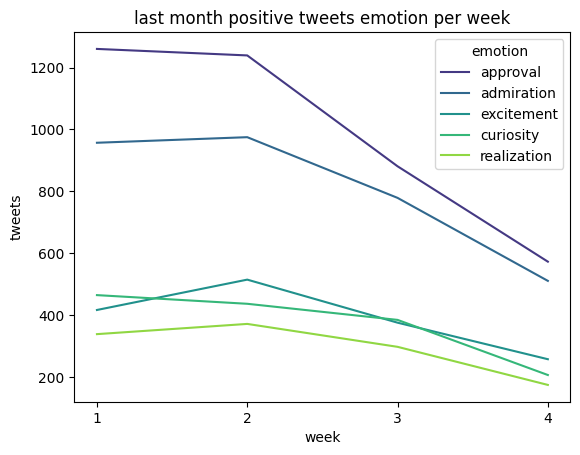

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

g = sns.lineplot(data=df_lpos_w, x="week", y="tweets", hue="emotion", palette='viridis')
g.set_xticks(range(4))
plt.title('last month positive tweets emotion per week')
g.set_xticklabels(['1', '2', '3', '4'])

[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

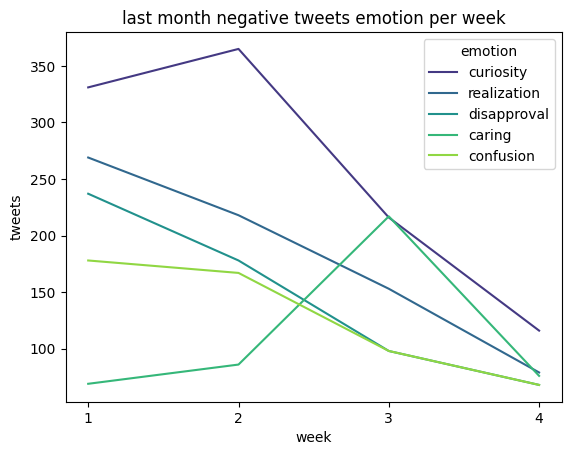

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

g = sns.lineplot(data=df_lneg_w, x="week", y="tweets", hue="emotion", palette='viridis')
g.set_xticks(range(4))
plt.title('last month negative tweets emotion per week')
g.set_xticklabels(['1', '2', '3', '4'])

# User description analysis

In [ ]:
udesc = df_lpos[["user_description"]]

In [ ]:
udesc = df_lneg[["user_description"]]

In [ ]:
udesc = df[df.label=="neutral"]
udesc = udesc[~udesc.user_name.isin(bots)][["user_description"]]

In [ ]:
udesc = df[["user_description"]]

In [ ]:
udesc.sample(5)

25910       create personal aigenerated artwork individual business graphic designer follow free sample work
18579           built successful company people sideprojects main chamaileonio emailheroio side friend learn
25930                                       helping outwork profit market algorithmic tool come join journey
6839       making tool freedom creativity everyone developed latitudegamesai post bug report feature request
5378     exploring frontier machine learning keeping updated latest greatest tool trend breakthrough aitools
Name: user_description, dtype: object

In [ ]:
udesc_words = udesc.user_description.str.split(' ').to_frame()
udesc_words = udesc_words.explode('user_description')

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

udesc_words = udesc_words.copy()
udesc_words.user_description = udesc_words.user_description.apply(lambda x: lemmatizer.lemmatize(x))

In [ ]:
from nltk.corpus import stopwords

stops = stopwords.words('english')
udesc_words = udesc_words.loc[~udesc_words.user_description.isin(stops)]

In [ ]:
udesc_words = udesc_words.reset_index()

p100 = udesc_words.size
p90 = p100 * 0.9
udesc_words = udesc_words.groupby('user_description')['index'].agg(['unique']).reset_index()
udesc_words = udesc_words.loc[udesc_words.unique.map(len) > 10]
udesc_words = udesc_words.loc[udesc_words.unique.map(len) < p90]
udesc_words['occurence'] = udesc_words.unique.map(len)
udesc_words = udesc_words[['user_description','occurence']]

udesc_words.head()

,user_description,occurence
82,academic,48
85,academy,13
96,accept,17
100,access,27
111,account,155


## positive tweets

In [ ]:
udesc_words_pos = udesc_words

In [ ]:
udesc_words_pos.sort_values(by=['occurence'], ascending=False).head(15)

,user_description,occurence
26845,tech,1676
3731,business,1621
7490,digital,1525
26946,technology,1449
16758,marketing,1228
29827,web,1211
10653,founder,1092
18837,news,1089
30345,world,1071
9062,enthusiast,977


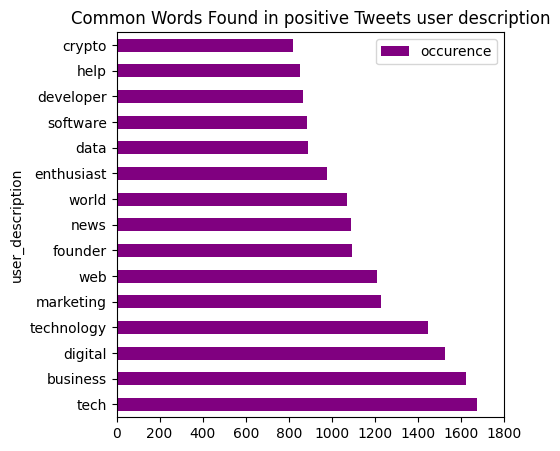

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
udesc_words_pos.sort_values(by='occurence', ascending=False).head(15).plot.barh(x='user_description',
                      y='occurence',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in positive Tweets user description")
ax.set_xticks(np.arange(0, 2000, 200))

plt.show()

## negative tweets

In [ ]:
udesc_words_neg = udesc_words

In [ ]:
udesc_words_neg.sort_values(by=['occurence'], ascending=False).head(15)

,user_description,occurence
12803,news,809
18364,tech,680
18412,technology,667
2490,business,614
4195,crypto,535
20407,web,521
20729,world,502
6039,engineer,502
5037,digital,474
7270,founder,455


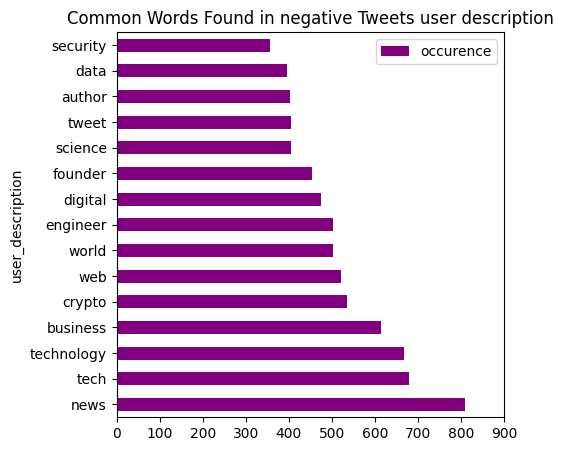

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
udesc_words_neg.sort_values(by='occurence', ascending=False).head(15).plot.barh(x='user_description',
                      y='occurence',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in negative Tweets user description")
ax.set_xticks(np.arange(0, 1000, 100))

plt.show()

## neutral tweets

In [ ]:
udesc_words_ntl = udesc_words

In [ ]:
udesc_words_ntl.sort_values(by=['occurence'], ascending=False).head(15)

,user_description,occurence
4708,business,2587
23947,news,2581
34103,tech,2371
34226,technology,2360
9323,digital,2153
38624,world,1938
37999,web,1918
21334,marketing,1639
13351,founder,1471
8355,data,1437


In [ ]:
len(udesc)

38434

## all last month tweets

In [ ]:
udesc_words_all = udesc_words

In [ ]:
udesc_words_all.sort_values(by=['occurence'], ascending=False).head(20)

,user_description,occurence
8823,chatgpt,12564
20818,free,6800
7333,business,5507
58830,web,5306
37076,news,5298
31011,let,5205
52962,technology,5107
33016,marketing,4991
52771,tech,4931
23178,grow,4913


In [ ]:
df.loc[df['user_description'].str.contains("free")]

,user_name,user_description,tweets,clean_tweets,label,date
51,bitone great,chatgpt powered free trading signal let grow millionaire binance bybit bitget,🚨Time to Sell!🚨\n💰#Binance Spot💰\n⬇ Recommendation: #Short 🔴\nTicker: #MTLBUSD\nTime Interval: 5min\nLast Price: 1.273\n🔴 RSI: 89.2\n\nPowered by #ChatGPT\n\n$MTL\n#MTL\n\nWhat are you gonna do?\n LONG WAIT SHORT\n 👇 👇 👇,time sell binance spot recommendation short ticker mtlbusd time interval min price rsi powered chatgpt mtl mtl gonna long wait short,neutral,2023-04-01 00:05:04+00:00
56,bitone great,chatgpt powered free trading signal let grow millionaire binance bybit bitget,🚨Sell Now!🚨\n💰#Binance Spot💰\n⬇ Recommendation: #Short 🔴\nTicker: #MTLBUSD\nTime Interval: 15min\nLast Price: 1.27\n🔴 RSI: 85.5\n\nPowered by #ChatGPT\n\n$MTL\n#MTL\n\nWhat are you gonna do?\n LONG WAIT SHORT\n 👇 👇 👇,sell now binance spot recommendation short ticker mtlbusd time interval min price rsi powered chatgpt mtl mtl gonna long wait short,neutral,2023-04-01 00:05:17+00:00
125,bitone great,chatgpt powered free trading signal let grow millionaire binance bybit bitget,📉#Sell!📉\n🔥RSI over 85!🔥\n[#Bybit]\n👇 Recommendation: #Short\n📊Ticker: #MTLUSDT📊\n5-minute Candle\nLast Price: 1.2909\nRSI: 89.9\n\n🔥Powered by #ChatGPT🔥\n\n$MTL\n#MTL\n#バイビット\n#바이비트,sell rsi bybit recommendation short ticker mtlusdt minute candle price rsi powered chatgpt mtl mtl,neutral,2023-04-01 00:15:14+00:00
129,timothy peterson cfa caia,manager canemacro author bitcoin spread like virus visit canedigital data update freemarkets freespeech,"In every movie I've ever seen, it all starts off good then ends terribly for humans. #ChatGPT #AI https://t.co/41aqLngLCC",movie ive seen start good end terribly human chatgpt,positive,2023-04-01 00:15:53+00:00
185,noticias del mundo,dont exercise freedom speech exercised freedom thought,#agix to the moon #BullMarket #Artificial_Intelligence #ChatGPT #GPT4 #gpt3 #fet #Bitcoin #AltCoinSeason #pump #SingularityNET https://t.co/NjYCs9dym7,agix moon bullmarket artificialintelligence chatgpt gpt gpt fet bitcoin altcoinseason pump singularitynet,neutral,2023-04-01 00:21:30+00:00
...,...,...,...,...,...,...
91113,italian circle,italian language culture explained english new video wednesday free grammar basic pdf,The latest headlines in #Italian are here!\n\nhttps://t.co/6RHfIFv4Ag\n\nLet's read and translate them together: there are many interesting words &amp; expressions to learn. Our topics today are #ChatGPT and a proposed ban on English words in Italian 😐\n#learnItalian #langtwt https://t.co/jqvSGwsIwm,latest headline italian here let read translate together interesting word amp expression learn topic today chatgpt proposed ban english word italian learnitalian langtwt,neutral,2023-04-26 13:00:01+00:00
91116,rod ponce,anthropologist went bschool instead lschool innovation bee bhivec bhivelabs canadastrongandfree,"The chatbot is tempting physicians with its ability to spout medical information, but researchers warn against trusting AI with tough... #chatgpt #pst https://t.co/cilHUv2uzI",chatbot tempting physician ability spout medical information researcher warn trusting tough chatgpt pst,negative,2023-04-26 13:00:03+00:00
91118,bitone great,chatgpt powered free trading signal let grow millionaire binance bybit bitget,📉#Sell!📉\n🔥RSI over 85!🔥\n[#Bybit]\n👇 Recommendation: #Short\n📊Ticker: #IOSTUSDT📊\n30-minute Candle\nLast Price: 0.010883\nRSI: 86.6\n\n🔥Powered by #ChatGPT🔥\n\n$IOST\n#IOST\n#バイビット\n#바이비트 https://t.co/tzJtgRC2Ce,sell rsi bybit recommendation short ticker iostusdt minute candle price rsi powered chatgpt iost iost,neutral,2023-04-26 13:00:16+00:00
91144,webstylepress,quality tip tutorial video free resource web developer programmer nontechies improve digital life,https://t.co/4TRb1fJQRg\nCan You Improve ChatGPT Response?\n#chatgpt #gpt #gpt4 #chatgpt4 #openai #WebStylePress #ai #artificialintelligence #gpt3 #gptchat #chatgpttutorial,improve chatgpt response chatgpt gpt gpt chatgpt op

In [ ]:
df.groupby("label").size()

label
negative    12508
neutral     49742
positive    28924
dtype: int64

In [ ]:
df.loc[df['user_description'].str.contains("free")].groupby("label").size()

label
negative     541
neutral     6469
positive     962
dtype: int64

In [ ]:
df.loc[df['user_description'].str.contains("free")].groupby("user_name").size().sort_values(ascending=False).nlargest(20)

user_name
bitone great                           4258
dan bruno                               819
comidoc                                 110
paramendra kumar bhagat                  92
leak                                     75
skanner                                  63
medipuzzle free gaming app medicine      44
edesh seba                               42
explorer                                 34
paul bellow litrpg adventure             32
ritekit api                              29
webstylepress                            29
techcircle                               25
atlas artwork                            24
kirk borne                               23
hetflix                                  22
chatgodai                                21
whatsnew day                             21
julie                                    19
machine mind                             18
dtype: int64

In [ ]:
df.groupby("user_name").size().sort_values(ascending=False)

user_name
bitone great            4258
chatgpt                 1397
dan brunelle            1055
dan bruno                819
torkild smith            736
                        ... 
hugh mungus satire         1
hugh harvey                1
hugh guiney software       1
huge thinking              1
knox                       1
Length: 37092, dtype: int64

In [37]:
len(df["user_name"].unique())

37092

In [39]:
len(df["user_name"].unique())-57

37035

In [2]:
df_temp = df.groupby("user_name").size().sort_values(ascending=False).reset_index(name = "n")
df_temp.loc[df_temp.n >= 60]

,user_name,n
0,bitone great,4258
1,chatgpt,1397
2,dan brunelle,1055
3,dan bruno,819
4,torkild smith,736
5,yuhanito,735
6,randompile,577
7,jimyapp,476
8,anthony hadfield phd,378
9,richard kim,351


In [48]:
df_temp_bots = df_temp.copy()
df_temp_bots.loc[df_temp_bots.n >= 60, 'user_name'] = "top 0.002% users"
df_temp_bots.loc[df_temp_bots.n < 60, 'user_name'] = "other"
df_temp_bots = df_temp_bots.groupby("user_name").sum().reset_index().set_index("user_name").sort_values("n", ascending=False)
df_temp_bots

,n
user_name,
other,74136
top 0.002% users,17038


In [49]:
57/37035

0.0015390846496557311

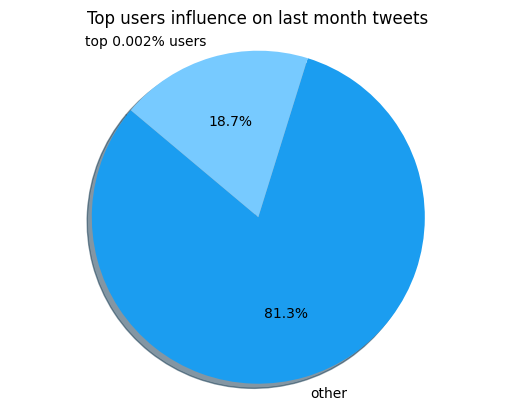

In [52]:
#plot the proportion of sentiments
import matplotlib.pyplot as plt 

labels = df_temp_bots.index.tolist()
sizes = df_temp_bots["n"].values.tolist()
colors = ["#1b9df0", "#77CAFF"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Top users influence on last month tweets')

plt.savefig('tweets_per_username_pie_last.png', bbox_inches='tight')
plt.show()

In [19]:
df_temp_other = df_temp.copy()
df_temp_other.loc[df_temp_other.n < 118, 'user_name'] = "other"
df_temp_other = df_temp_other.groupby("user_name").sum().reset_index().set_index("user_name").sort_values("n", ascending=False)
df_temp_other

,n
user_name,
other,76426
bitone great,4258
chatgpt,1397
dan brunelle,1055
dan bruno,819
torkild smith,736
yuhanito,735
randompile,577
jimyapp,476


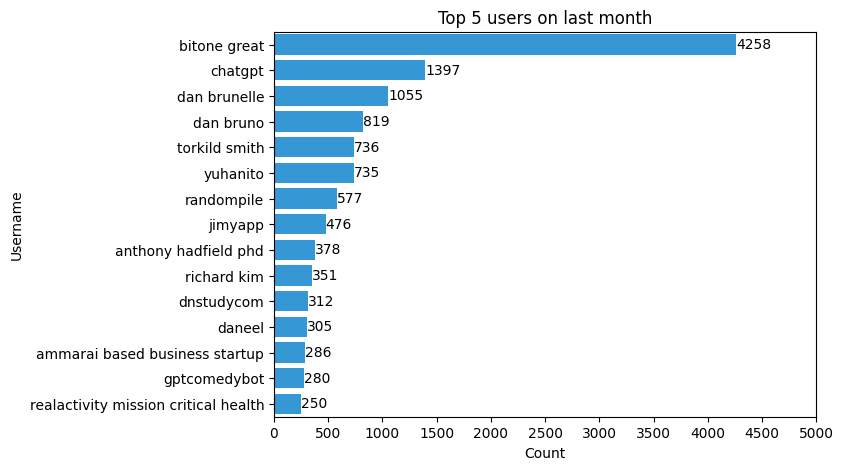

In [29]:
# plot top 5 positive topics as horizontal bar chart
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(7, 5))
ax = sns.barplot(data=df_temp.head(15), x="n", y="user_name", color="#1b9df0")
plt.title('Top 5 users on last month')
plt.xlabel('Count')
plt.ylabel('Username')

ax.set_xticks(np.arange(0, 5500, 500))
for i in ax.containers:
    ax.bar_label(i,)

plt.savefig('tweets_per_username_last.png', bbox_inches='tight')
plt.show()

In [ ]:
#plot the proportion of sentiments
import matplotlib.pyplot as plt 

labels = df_temp_other.
sizes = [len(negatives), len(positives), len(neutrals)]
colors = ['#39827a', '#9acfc9', '#d7f7ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution of last month of launching, overall')
plt.show()

In [ ]:
df_lneg.groupby("user_name").size().sort_values(ascending=False).nlargest(20)

user_name
dan brunelle                             170
dan bruno                                120
daniel                                    97
daneel                                    95
richard kim                               54
jude dennis                               52
gptcomedybot                              43
orf geotech                               41
anthony hadfield phd                      39
crypto talkie sentiment analysis tool     36
james                                     35
jason rowes stupid face                   32
ntangled cloud                            30
madmax                                    28
beyondbacktesting                         27
kevi odc                                  26
jensen gunz                               26
bitone great                              25
neuss                                     24
digital news                              23
dtype: int64

In [ ]:
df_lpos.groupby("user_name").size().sort_values(ascending=False).nlargest(20).size

20

In [ ]:
df.loc[df['user_name'] == "chatgpt"].groupby("user_description").size()

user_description
chatgpt language model developed openai designed respond textbased query generate natural language response       2
chatgpt natural language processing tool driven artificial intelligence technology web                            4
chatgpt plus                                                                                                   1302
chatgpt shuangluoxuan kwl                                                                                         2
chatgpt tiktokappleid gmail shuangluoxuan kwl                                                                     1
chatgptapp join chatgpt family movement following account gpt future                                              1
create image chatgpt prompt creation                                                                              4
creating beautiful image passion programming profession stack development skill                                   1
dude brain big                                         

In [ ]:
df.loc[df['user_name'] == "torkild smith"].groupby("user_description").size()

user_description
adopting innovative datadriven strategy branding webdesign marketing sale digitalmarketing web chatgpt expert promptengineer    736
dtype: int64

In [ ]:
df.loc[df['user_name'] == "yuhanito"].groupby("user_description").size()

user_description
adopting innovative datadriven strategy branding webdesign marketing sale digitalmarketing web chatgpt expert promptengineer    735
dtype: int64

In [ ]:
df.loc[df['user_name'] == "dan brunelle"].groupby("user_description").size()

user_description
latest chatgpt amazing tool us including dan jailbreak    1055
dtype: int64

In [ ]:
df.loc[df['user_name'] == "dan bruno"].groupby("user_description").size()

user_description
latest chatgpt bard bing amazing news tool subscribe free newsletter    819
dtype: int64

In [58]:
df.loc[df['user_name'] == "dan bruno"].groupby("tweets").size().sort_values(ascending=False).nlargest(3)

tweets
Air India Makes $200 Million Initial Investment To Use ChatGPT-Driven Chatbot - BQ Prime https://t.co/NRUBRjoB23 #chatgpt #AI #openAI    2
MORNING BID EUROPE-Zooming in on AI, rates and chips wars - Yahoo Finance https://t.co/thsy7KalI4 #chatgpt #AI #openAI                   2
ChatGPT writes short 'horror story' and it bewilders netizens - Economic Times https://t.co/Huh7tj3R9W #chatgpt #AI #openAI              2
dtype: int64

In [59]:
df.loc[df['user_name'] == "bitone great"].groupby("tweets").size().sort_values(ascending=False).nlargest(3)

tweets
🚨Get In!🚨\n💰#Binance Spot💰\n⬆️ Recommendation: #Long 🟢\nTicker:  #HARDBUSD\nTime Interval:  5min\nLast Price: 0.1688\n🟢 RSI: 4.8\n\nPowered by #ChatGPT\n\n$HARD\n#HARD\n#ブリッジオラクルトークン\n#pump\n\nWhat are you gonna do?\n👇LONG        👇WAIT         👇SHORT https://t.co/J1EF0OBw8M          2
🚨Time to Buy!🚨\n💰#Binance Spot💰\n⬆️ Recommendation: #Long 🟢\nTicker:  #BIFIBUSD\nTime Interval:  5min\nLast Price: 442.3\n🟢 RSI: 12.8\n\nPowered by #ChatGPT\n\n$BIFI\n#BIFI\n#ビットコインキャッシュ\n#Audius\n\nWhat are you gonna do?\n👇LONG        👇WAIT         👇SHORT https://t.co/C6aOx72Ofo    2
🚨Sell Now!🚨\n💰#Binance Spot💰\n⬇ Recommendation: #Short 🔴\nTicker:  #MLNBUSD\nTime Interval:  5min\nLast Price: 20.44\n🔴 RSI: 87.2\n\nPowered by #ChatGPT\n\n$MLN\n#MLN\n#コインチェック\n#Filecoin\n\nWhat are you gonna do?\n👇LONG        👇WAIT         👇SHORT https://t.co/rY8TsRyVq3            2
dtype: int64

In [60]:
df.loc[df['user_name'] == "bitone great"].groupby("clean_tweets").size().sort_values(ascending=False).nlargest(3)

clean_tweets
sell rsi bybit recommendation short ticker tomousdt minute candle price rsi powered chatgpt tomo tomo    37
sell rsi bybit recommendation short ticker hntusdt minute candle price rsi powered chatgpt hnt hnt       28
sell rsi bybit recommendation short ticker sxpusdt minute candle price rsi powered chatgpt sxp sxp       21
dtype: int64

In [ ]:
df.loc[df['user_name'] == "realactivity mission critical health"].groupby("clean_tweets").size().sort_values(ascending=False).nlargest(20)

clean_tweets
unlock potential openai healthcare leader executive guide download himss chatgpt fhir gpt smarthit                                                                                          12
harness power openai healthcare success executive guide himss chatgpt healthcareoperations healthcarecio msc                                                                                 8
healthcare executive love morning coffee himss it perfect blend caffeine humor special edition chatgpt guide download openai womaninhit boshug realactivity                                  7
whats secret successful morning healthcare leader himss hot cup coffee special edition chatgpt guide joke here openai fhir gpt smarthit                                                      6
transform healthcare openai prompt executive guide download himss chatgpt healthcareit healthcaresecurity mvpbuzz                                                                            6
himss today chat pswider chatgpt

In [57]:
df.loc[df['user_name'] == "torkild smith"].groupby("tweets").size().sort_values(ascending=False).nlargest(3)

tweets
🌟 Enhance your business with cutting-edge AI technology! Our #ChatGPT for Beginners course offers the perfect introduction for companies embracing the digital world. Sign up now: https://t.co/kAF7l0d2qN #BusinessInnovation #AI https://t.co/h3jh2BlwJk    2
🌟 Enhance your business with cutting-edge AI technology! Our #ChatGPT for Beginners course offers the perfect introduction for companies embracing the digital world. Sign up now: https://t.co/kAF7l0d2qN #BusinessInnovation #AI https://t.co/l4UUeuT3cR    2
🌟 Enhance your business with cutting-edge AI technology! Our #ChatGPT for Beginners course offers the perfect introduction for companies embracing the digital world. Sign up now: https://t.co/kAF7l0d2qN #BusinessInnovation #AI https://t.co/q5qRMzy3pt    2
dtype: int64

In [61]:
df.loc[df['user_name'] == "torkild smith"].groupby("clean_tweets").size().sort_values(ascending=False).nlargest(3)

clean_tweets
enhance business cuttingedge technology chatgpt beginner course offer perfect introduction company embracing digital world sign now businessinnovation    736
dtype: int64

In [56]:
df.loc[df['user_name'] == "yuhanito"].groupby("tweets").size().sort_values(ascending=False).nlargest(3)

tweets
🚀 Discover the power of #ChatGPT with our beginner-friendly course! Empower your business with AI-driven solutions for better communication and productivity. Enroll now: https://t.co/8P3qFUKjuG #AI #DigitalTransformation https://t.co/zzHdQplzR6    2
🚀 Discover the power of #ChatGPT with our beginner-friendly course! Empower your business with AI-driven solutions for better communication and productivity. Enroll now: https://t.co/8P3qFUKjuG #AI #DigitalTransformation https://t.co/D2e8feWaGh    2
🚀 Discover the power of #ChatGPT with our beginner-friendly course! Empower your business with AI-driven solutions for better communication and productivity. Enroll now: https://t.co/8P3qFUKjuG #AI #DigitalTransformation https://t.co/MwtY3A8yGo    2
dtype: int64

In [54]:
df.loc[df['user_name'] == "realactivity mission critical health"].groupby("tweets").size().sort_values(ascending=False).nlargest(3)

tweets
Harness the power of #OpenAI for healthcare success! \n\nGet our executive guide for #HIMSS23: https://t.co/dsdT8CR1Yh \n\nSchedule a 15-min Intro with Us: https://t.co/VnoQEMu3m4\n\n#ChatGPT #HealthcareOperations #HealthcareCIO #MSC https://t.co/zJVNVf4FXQ                                                 2
#HIMSS2023 special: Expert help on ChatGPT governance &amp; planning for healthcare execs, alongside 250+ innovative prompts to boost your creativity: https://t.co/Bc1ErbCaBv 🌟\n\n#HIMSS23 #ChatGPT #ResponsibleAI #MSCloudHealth #SocialDeterminants #IntelligentRVUs #AIGovernance https://t.co/JWR2H07dxp    1
What's on the menu for healthcare executives at #HIMSS23? A side of laughter with our special edition #ChatGPT guide to spice up lunchtime! 🥗😆\n\nDownload: https://t.co/dsdT8CR1Yh \n\n#OpenAI #HealthcareIT #HealthcareSecurity #mvpBuzz https://t.co/xeWh1KiVrR                                                1
dtype: int64

In [ ]:
df_lpos.loc[df_lpos['user_name'] == "yuhanito"].groupby("emotion").size().sort_values(ascending=False).nlargest(20)

emotion
approval    733
caring        2
dtype: int64

In [ ]:
df_lpos.size

231392

In [ ]:
df_lpos.loc[df_lpos['user_name'] == "realactivity mission critical health"].groupby("emotion").size().sort_values(ascending=False).nlargest(20)

user_name
chatgpt                                             1148
torkild smith                                        736
yuhanito                                             735
realactivity mission critical health                 178
birdboxbot                                           156
boston healthcare cloud community                    152
dan bruno                                            146
dan brunelle                                         146
nxmstagram                                           141
prompt adviser                                       111
gptcomedybot                                         108
jeff kagan technology industry analyst columnist     107
barry allen                                           86
tool hunt                                             70
daneel                                                65
jimyapp                                               53
michael ace                                           51
best midjourneyai gen

In [ ]:
df_lpos.loc[df_lpos["emotion"] == "neutral"].groupby("user_name").size().sort_values(ascending=False).nlargest(20)

user_name
chatgpt                                           382
dan bruno                                         118
dan brunelle                                      113
realactivity mission critical health               62
boston healthcare cloud community                  60
prompt adviser                                     60
jimyapp                                            45
coruzant technology                                41
tool hunt                                          37
kochery shibu author entrepreneur thinker doer     36
gptcomedybot                                       35
crypto talkie sentiment analysis tool              35
anthony hadfield phd                               32
brian thomas                                       32
richard kim                                        32
paramendra kumar bhagat                            30
birdboxbot                                         30
store                                              26
john nosta        

In [ ]:
df.loc[df['user_name'] == "chatgpt"].groupby("user_description").size()

user_description
chatgpt language model developed openai designed respond textbased query generate natural language response       2
chatgpt natural language processing tool driven artificial intelligence technology web                            4
chatgpt plus                                                                                                   1302
chatgpt shuangluoxuan kwl                                                                                         2
chatgpt tiktokappleid gmail shuangluoxuan kwl                                                                     1
chatgptapp join chatgpt family movement following account gpt future                                              1
create image chatgpt prompt creation                                                                              4
creating beautiful image passion programming profession stack development skill                                   1
dude brain big                                         